In [60]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [61]:
a = 0.0
b = 1.0
y_0 = 0.0
n = 100
B = 0.1
c = np.arange(a,b+(b-a)/(2*n),(b-a)/n)

def f(z_0):
    
    dx = (b-a)/n
    
    # Set up variables
        
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    u = np.zeros(n+1)
    
    x[0] = 0
    y[0] = y_0
    u[0] = z_0
    
    for i in range (1,n+1):
        
        x[i] = dx*i
        y[i] = u[i-1]*dx + y[i-1]
        u[i] = (12*x[i] - 4)*dx + u[i-1]
    return x,y,y[n]

In [62]:
def F(z_0):               ## Funcion a Minimizar
    F = f(z_0)[2] - B
    return F

In [63]:
def s_m(z_0,z_1):        ## Minimizacion para hallar z_0
    tol = 1e-8
    z = z_0
    y = z_1
    x = 0.0
    while abs(F(y)) > tol:
        x = y - F(y)*(y-z)/(F(y)-F(z))
        z = y
        y = x
    return y

q = s_m(0.0,1.0)

In [64]:
def g(x):                   ## Funcion Teorica
    g = 2*x**3 - 2*x**2 + 0.1*x
    return g

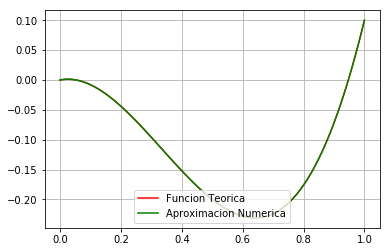

In [69]:
plt.grid()                    ## Comparacion Grafica

plt.plot(c,g(c),'r')
plt.plot(f(q)[0],f(q)[1],'g')
plt.legend(('Funcion Teorica', 'Aproximacion Numerica'),prop = {'size':10}, loc = 'lower center')
